# Modelos de Regresión Lineal.
## Modelo con datos simulados.
* y = a + b * x
* X: 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e está distribuida según una N(0, 0.8)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [65]:
x = 1.5 + 2.5 * np.random.randn(100)

In [66]:
res = 0 + 0.8 * np.random.randn(100)

In [67]:
y_pred = 5 + 1.9 * x

In [68]:
y_act = 5 + 1.9 * x + res

Text(0.5, 1.0, 'proof Jorge')

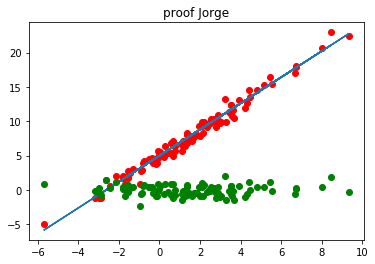

In [72]:
%matplotlib inline
plt.plot(x, y_act, "ro")
plt.plot(x, y_pred)
plt.plot(x, res, "go")
plt.title("proof Jorge")

In [73]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [74]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_pred": y_pred_list
    }
)

In [75]:
data.head()

,x,y_actual,y_pred
0,6.752449,17.930355,17.829653
1,1.595011,7.187273,8.030521
2,-0.518673,4.376973,4.014521
3,-1.714871,0.833091,1.741745
4,2.546141,10.295564,9.837667


In [77]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

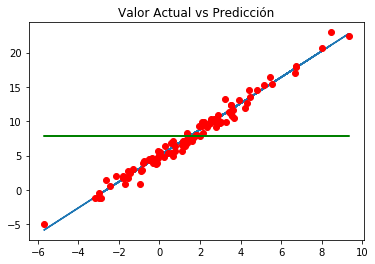

In [78]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Cómo es la predicción de buena?
* SST = SSD + SSR.
* SST : Variabilidad de los datos con respecto a su media.
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguír una distribución normal).
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar.
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1.

In [85]:
data["SSR"] = (data["y_pred"] - np.mean(y_act)) ** 2
data["SSD"] = (data["y_pred"] - data["y_actual"]) ** 2
data["SST"] = (data["y_actual"] - np.mean(y_act)) ** 2

In [86]:
data.head()

,x,y_actual,y_pred,SSR,SSD,SST
0,6.752449,17.930355,17.829653,100.271750,0.010141,102.298658
1,1.595011,7.187273,8.030521,0.045987,0.711067,0.395391
2,-0.518673,4.376973,4.014521,14.451810,0.131371,11.827422
3,-1.714871,0.833091,1.741745,36.897480,0.825652,48.762059
4,2.546141,10.295564,9.837667,4.086837,0.209669,6.147867


In [87]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [88]:
SSR

2580.313112012854

In [89]:
SSD

56.31985978462543

In [90]:
SST

2645.177477892544

In [91]:
SSR + SSD

2636.6329717974795

In [92]:
R2 = SSR / SST

In [93]:
R2

0.9754782556475687

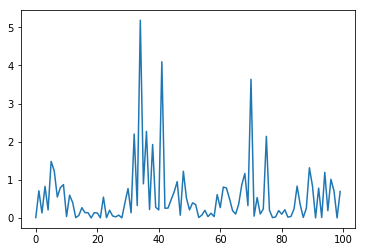

In [94]:
plt.plot(data["SSD"])

(array([ 2.,  1., 11., 20., 20., 19., 19.,  5.,  2.,  1.]),
 array([-2.02371588, -1.59365562, -1.16359536, -0.7335351 , -0.30347484,
         0.12658542,  0.55664567,  0.98670593,  1.41676619,  1.84682645,
         2.27688671]),
 <a list of 10 Patch objects>)

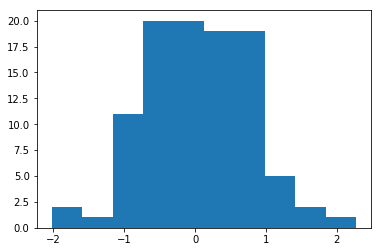

In [95]:
plt.hist(data["y_pred"] - data["y_actual"])

## Obteniendo la recta de regresión.
* y = a + b * x
* b = sum((xi - x_m) * (y_i - y_m)) / sum((xi - x_m)^2)
* a = y_n - b * x_m

In [100]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5118483217875767, 7.816074628094275)

In [103]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"] - x_mean) ** 2

In [104]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [106]:
alpha = y_mean - beta * x_mean

In [107]:
alpha, beta

(4.938451551316295, 1.9033808056720534)

El modelo lineal obtenido por mi regresión es: y = 4.938451551316295 + 1.9033808056720534 * x

In [108]:
data["y_model"] = alpha + beta * data["x"]
data.head()

,x,y_actual,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,6.752449,17.930355,17.829653,100.271750,0.010141,102.298658,53.004901,27.463894,17.790933
1,1.595011,7.187273,8.030521,0.045987,0.711067,0.395391,-0.052293,0.006916,7.974365
2,-0.518673,4.376973,4.014521,14.451810,0.131371,11.827422,6.983170,4.123018,3.951219
3,-1.714871,0.833091,1.741745,36.897480,0.825652,48.762059,22.532128,10.411718,1.674399
4,2.546141,10.295564,9.837667,4.086837,0.209669,6.147867,2.564517,1.069761,9.784727


In [112]:
SSR = sum((data["y_model"] - y_mean) ** 2)
SSD = sum((data["y_model"] - data["y_actual"]) ** 2)
SST = sum((data["y_actual"] - y_mean) ** 2)

In [113]:
SSR, SSD, SST

(2589.1843023562283, 55.993175536313835, 2645.177477892544)

In [115]:
R2 = SSR / SST
R2

0.9788319778146128

Text(0.5, 1.0, 'Valor Actual vs Predicción')

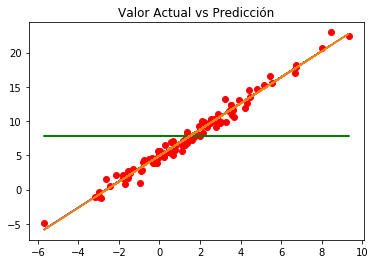

In [117]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándard de los residuos (RSE)

In [119]:
RSE = np.sqrt(SSD / (len(data) - 2))
RSE

0.7558828838146944

In [120]:
np.mean(data["y_actual"])

7.816074628094275

In [123]:
porciento_de_error = (RSE / np.mean(data["y_actual"])) * 100
porciento_de_error

9.670875980351209